In [1]:
from google.colab import files
uploaded = files.upload()

Saving Play Tennis.csv to Play Tennis.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df= pd.read_csv('Play Tennis.csv')
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


#HANDLING CATEGORICAL DATA

In [4]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [5]:
x=df[['Day','Humidity','Wind']]

In [6]:
y=df['Play_Tennis']

#GRAPHS

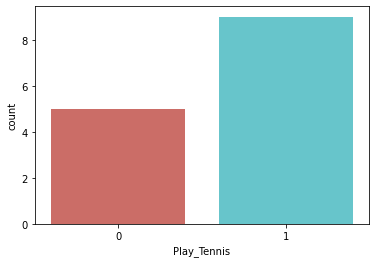

In [7]:
seaborn.countplot(x='Play_Tennis',data=df, palette='hls')
plt.show()


#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

#NORMALIZING DATA

In [9]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#ALGORITHM

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

#FITTING OF TRAINING DATA

In [11]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [12]:
y_predictions = dt.predict(X_test)

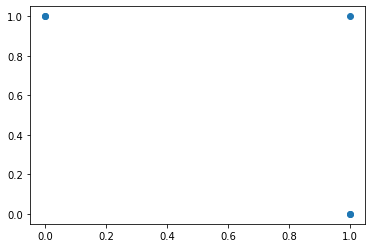

In [13]:
plt.scatter(y_test,y_predictions)

#EVALUATION

In [14]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,y_predictions))
print('Mean squared error is:', metrics.mean_squared_error(y_test,y_predictions))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))

Mean abolute error is: 0.8
Mean squared error is: 0.8
Root mean squared error is: 0.8944271909999159


In [16]:
print(metrics.accuracy_score(y_test,y_predictions))

0.2


#SAVING THE MODEL USING PICKLE LIBRARY

In [17]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(dt) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_test) 


array([1, 1, 0, 0, 1])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [18]:
y_train = y_train[0:5]
results =confusion_matrix(y_train, y_predictions)
print(results)

[[0 2]
 [2 1]]


Precision, Recall, Support, Fscore

In [19]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train, y_predictions, average='macro')

(0.16666666666666666, 0.16666666666666666, 0.16666666666666666, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [20]:

results =confusion_matrix(y_test, y_predictions)
print(results)

[[0 2]
 [2 1]]


Precision, Recall, Support, Fscore

In [21]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predictions, average='macro')

(0.16666666666666666, 0.16666666666666666, 0.16666666666666666, None)